# Preprocessing

What to do in preprocessing
- Handling missing values
- Encoding of categorical variables
- Feature scaling

In [10]:
import pandas as pd
merged_data = pd.read_csv("merged_data.csv")

# Check for missing values
missing_values = merged_data.isnull().sum()

missing_values


Date                    0
Open                    0
High                    0
Low                     0
Close                   0
Adj Close               0
Volume                  0
Ticker                  0
Sentiment_Score     30397
New_Covid_Cases    150833
MarketCap               0
dtype: int64

Only SentimentScore has 176,469 missing values.

In [2]:
# Check the data types of each column
data_types = merged_data.dtypes

data_types

Date                object
Open               float64
High               float64
Low                float64
Close              float64
Adj Close          float64
Volume               int64
Ticker              object
Sentiment_Score    float64
New_Covid_Cases    float64
MarketCap            int64
dtype: object

******************************************************

## How to deal with missing values

In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv("merged_data.csv")

# Display the first few rows of the dataset
df.head(2)


,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,Sentiment_Score,New_Covid_Cases,MarketCap
0,2013-04-30,32.560001,33.110001,32.279999,33.099998,27.390682,75165200,MSFT,5.60,NaN,2424341266432
1,2013-05-01,32.930000,33.080002,32.599998,32.720001,27.076227,54330900,MSFT,0.04,NaN,2424341266432


In [7]:
# Calculate the number of missing values for each column
missing_values = df.isnull().sum()

missing_values


Date                    0
Open                    0
High                    0
Low                     0
Close                   0
Adj Close               0
Volume                  0
Ticker                  0
Sentiment_Score     30397
New_Covid_Cases    150833
MarketCap               0
dtype: int64

- Sentiment_Score: 30,397 missing values
- New_Covid_Cases: 150,833 missing values

In [8]:
# Filling missing values in 'New_Covid_Cases' column with 0
df['New_Covid_Cases'].fillna(0, inplace=True)

# Verify if missing values in 'New_Covid_Cases' have been filled
missing_values_updated = df.isnull().sum()

missing_values_updated


Date                   0
Open                   0
High                   0
Low                    0
Close                  0
Adj Close              0
Volume                 0
Ticker                 0
Sentiment_Score    30397
New_Covid_Cases        0
MarketCap              0
dtype: int64

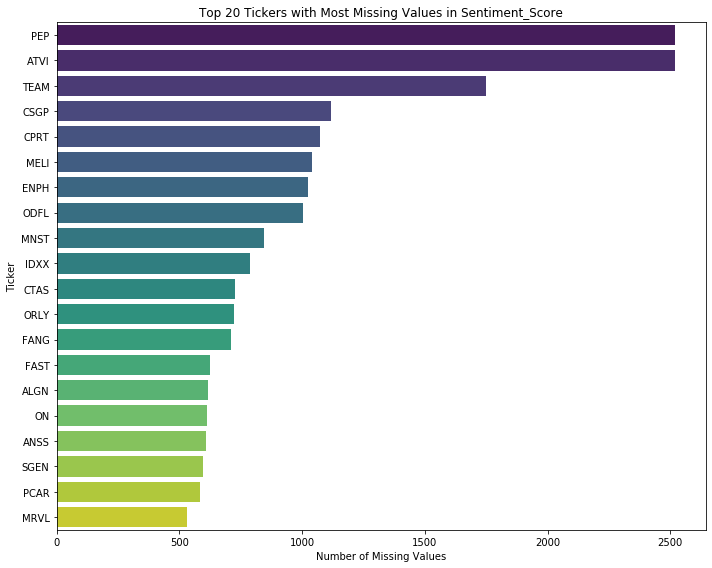

In [10]:
# Get the top 20 tickers with the most missing values in 'Sentiment_Score'
top_20_missing = missing_values_by_ticker.sort_values(ascending=False).head(20)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x=top_20_missing.values, y=top_20_missing.index, palette="viridis")
plt.title('Top 20 Tickers with Most Missing Values in Sentiment_Score')
plt.xlabel('Number of Missing Values')
plt.ylabel('Ticker')
plt.tight_layout()

plt.show()

In [11]:
# Check if "PEP" and "ATVI" do not have sentiment scores
pep_atvi_missing = top_20_missing[["PEP", "ATVI"]]

pep_atvi_missing


Ticker
PEP     2518
ATVI    2518
dtype: int64

In [13]:
# Drop rows where the Ticker is either "PEP" or "ATVI"
df = df[~df['Ticker'].isin(["PEP", "ATVI"])]

# Verify the changes
remaining_missing_values = df[df['Sentiment_Score'].isnull()].groupby('Ticker').size()

# Check if "PEP" and "ATVI" are still in the dataset
"PEP" in remaining_missing_values.index, "ATVI" in remaining_missing_values.index


(False, False)

In [14]:
# Filling missing values in 'Sentiment_Score' column with 0
df['Sentiment_Score'].fillna(0, inplace=True)

# Verify if missing values in 'Sentiment_Score' have been filled
remaining_missing_values_updated = df.isnull().sum()

remaining_missing_values_updated


Date               0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
Ticker             0
Sentiment_Score    0
New_Covid_Cases    0
MarketCap          0
dtype: int64

In [15]:
df.to_csv("After_preprocessing.csv", index=False)

In [19]:
df["Ticker"].unique()

array(['MSFT', 'AAPL', 'NVDA', 'AMZN', 'META', 'TSLA', 'GOOGL', 'GOOG',
       'AVGO', 'COST', 'ADBE', 'CSCO', 'NFLX', 'AMD', 'CMCSA', 'TMUS',
       'TXN', 'INTC', 'HON', 'INTU', 'QCOM', 'ISRG', 'AMGN', 'AMAT',
       'SBUX', 'BKNG', 'ADI', 'MDLZ', 'GILD', 'ADP', 'VRTX', 'LRCX',
       'PYPL', 'REGN', 'PANW', 'MU', 'CSX', 'SNPS', 'KLAC', 'ASML',
       'CDNS', 'FTNT', 'ORLY', 'MNST', 'MAR', 'CHTR', 'MELI', 'ABNB',
       'NXPI', 'MRVL', 'DXCM', 'CTAS', 'MCHP', 'MRNA', 'LULU', 'ADSK',
       'PDD', 'WDAY', 'PCAR', 'AEP', 'KDP', 'KHC', 'IDXX', 'CPRT', 'PAYX',
       'ON', 'EXC', 'ODFL', 'BIIB', 'AZN', 'ROST', 'GEHC', 'EA', 'SGEN',
       'CSGP', 'GFS', 'XEL', 'BKR', 'CTSH', 'FAST', 'VRSK', 'CRWD',
       'DLTR', 'WBD', 'DDOG', 'CEG', 'ILMN', 'ANSS', 'ALGN', 'TEAM',
       'WBA', 'FANG', 'ENPH', 'EBAY', 'ZS', 'SIRI', 'ZM', 'JD', 'LCID'],
      dtype=object)

# Exploratory Data Analysis (EDA)


## 5.1 Descriptive Statistics


First, let's provide a summary of the dataset's main characteristics using descriptive statistics. This includes measures such as mean, standard deviation, minimum and maximum values for each column. We commence by summarizing the numerical attributes within our dataset.

In [1]:
import pandas as pd
merged_data = pd.read_csv("After_preprocessing.csv")

In [22]:
# Calculating summary statistics for the numerical columns
merged_data.describe().transpose().to_csv("descriptive_table.csv")

- Stock Prices (Open, High, Low, Close, Adj Close): The minimum price is 0.70 dollar while the maximum is 2,703.26 dollar. The distribution of prices appears to be right-skewed, as the mean is significantly greater than the median.

- Volume: The trading volume displays substantial variability, ranging from days with zero traded volume to those exceeding a billion.

- Sentiment_Score: The average sentiment score is around 0.67. However, this metric is susceptible to significant fluctuations, spanning from -96.88 to 66.62. This wide range underscores the immense variability in daily news sentiment for different firms.

- New_Covid_Cases: The mean daily count of new COVID-19 cases in the US stands at approximately 28,570. With the maximum number of cases recorded in a single day being over 1.26 million, it underscores the magnitude of the pandemic's peak phases.

- MarketCap: The companies' market capitalization exhibits a wide range, spanning from roughly 15 billion dollar to a staggering 2.8 trillion dollar.

## 5.2 Data Visualization


### 5.2.1 Distribution of Sentiment Score
First, we'll plot the distribution of the Sentiment_Score variable to understand how news sentiments are distributed over the entire dataset.

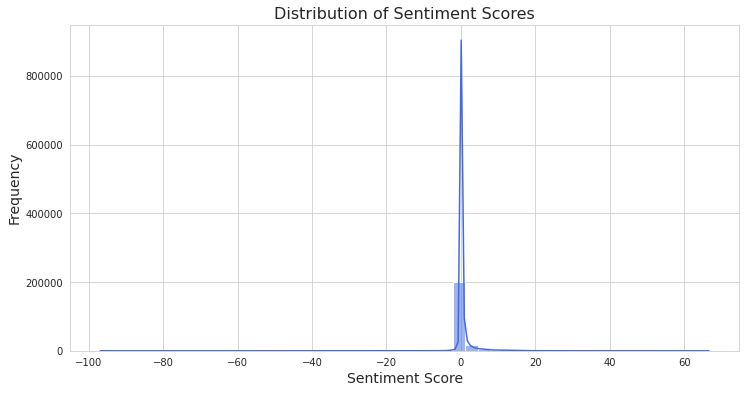

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn plots
sns.set_style("whitegrid")

# Plot distribution of Sentiment_Score
plt.figure(figsize=(12, 6))
sns.histplot(merged_data['Sentiment_Score'], bins=50, color='royalblue', kde=True)
plt.title('Distribution of Sentiment Scores', fontsize=16)
plt.xlabel('Sentiment Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.savefig("Distribution of Sentiment Score.pdf", format='pdf')
plt.show()


The histogram illustrates the distribution of the sentiment scores. A few observations can be made:

A major portion of the sentiment scores is clustered around the 0 mark, indicating many days have neutral or minimal sentiment.
The distribution shows slight positive skewness, with a significant number of days having positive sentiment scores.
There are fewer days with strongly negative sentiment scores compared to those with positive scores. However, the existence of both positive and negative extremes indicates significant news events that have affected the stock market.

### 5.2.2 Temporal Evolution of Average Sentiment

To understand how the sentiment has evolved over time, we'll plot the average sentiment score over our timeframe. This will be instrumental in discerning any discernible patterns or shifts in sentiment, especially around significant market or global events.

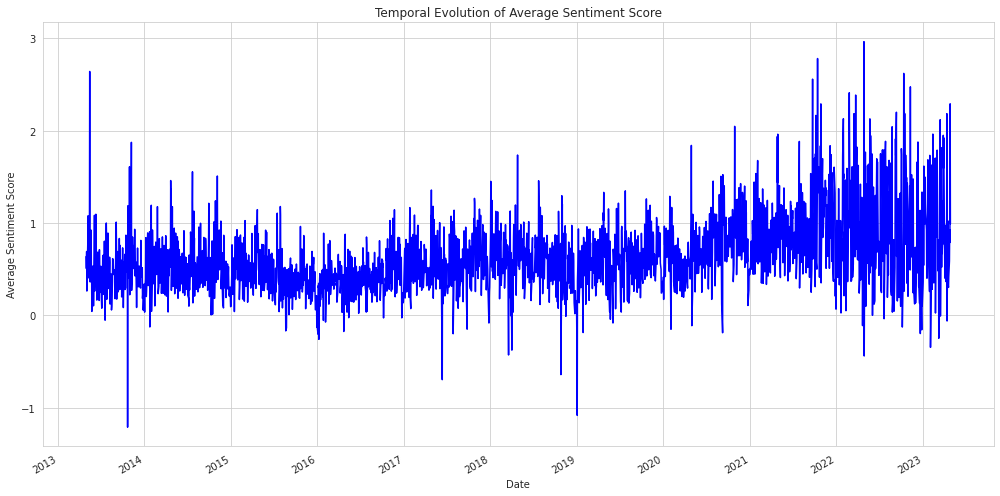

In [33]:
# Convert the 'Date' column to datetime format
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# Group by date and calculate the mean sentiment score
avg_sentiment = merged_data.groupby('Date')['Sentiment_Score'].mean()

# Plotting
plt.figure(figsize=(14, 7))
avg_sentiment.plot(color='blue')
plt.title('Temporal Evolution of Average Sentiment Score')
plt.ylabel('Average Sentiment Score')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()

The line chart elucidates the temporal evolution of the average sentiment scores across our dataset. Key insights include:

- The sentiment scores exhibit fluctuations over time, reflecting the dynamic nature of news and its inherent variability.
- While there are periods of relative stability, we observe pronounced spikes and troughs at certain intervals. These could correspond to significant market events, corporate announcements, or global occurrences.
- The sentiment seems to experience volatility, especially around 2020, potentially alluding to the onset and progression of the COVID-19 pandemic and its multifaceted impact on global markets.

Understanding the temporal dynamics of sentiment scores is imperative. It offers a lens through which we can contextualize stock returns and assess if and how significant events manifest in news sentiment.

### 5.2.3 Average Sentiment Score by Company

By examining the average sentiment scores across various companies, we can discern patterns or biases in news coverage. For instance, certain companies might consistently receive positive news coverage due to their strategic decisions, innovations, or corporate governance, while others might often be portrayed in a negative light.

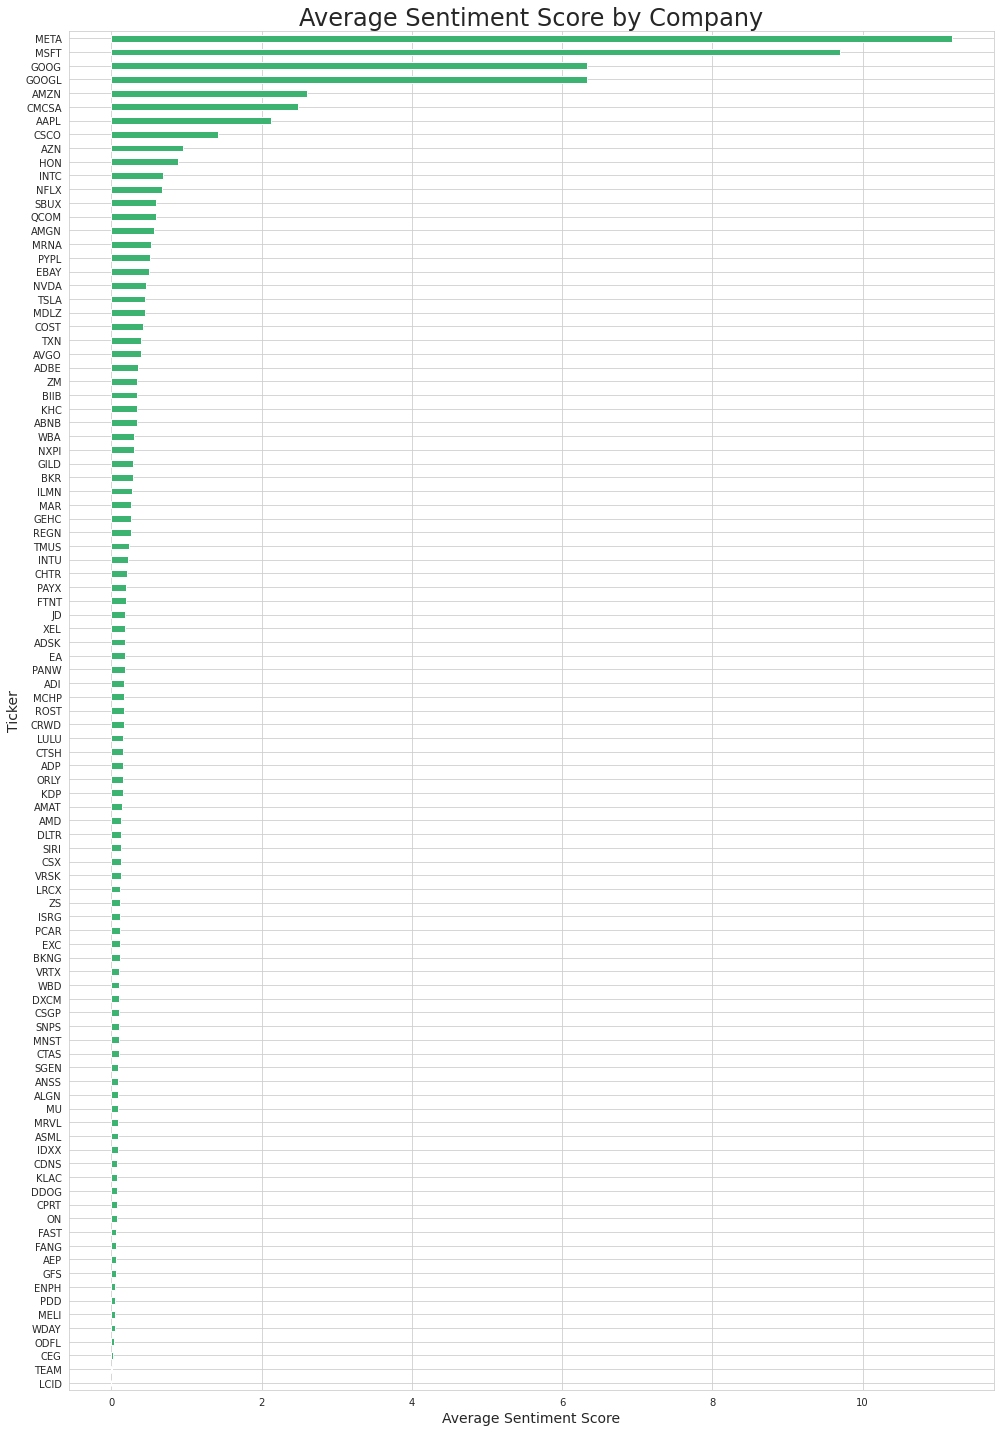

In [28]:
# Calculating average sentiment score for each company
avg_sentiment_per_company = merged_data.groupby('Ticker')['Sentiment_Score'].mean().sort_values()

# Plotting the average sentiment scores for each company
plt.figure(figsize=(14, 20))
avg_sentiment_per_company.plot(kind='barh', color='mediumseagreen')
plt.title('Average Sentiment Score by Company', fontsize=24)
plt.xlabel('Average Sentiment Score', fontsize=14)
plt.ylabel('Ticker', fontsize=14)
plt.tight_layout()
plt.savefig("Average Sentiment Score by Company.pdf", format='pdf')
plt.show()


The horizontal bar chart illuminates the average sentiment scores for various companies over the dataset's duration:

- Companies exhibit a broad spectrum of average sentiment scores, ranging from slightly negative to notably positive. This diversity in sentiment underscores the differential media portrayal and news coverage these entities receive.
- A majority of the firms cluster around a neutral average sentiment, indicative of balanced news coverage over the period.
- Certain companies like 'ZS', 'WBA', and 'WBD' tend towards the positive end, suggesting consistent favorable news coverage. Conversely, firms like 'DDOG', 'LCID', and 'GEHC' lean towards the negative end, implying that they might have been subjects of more critical or unfavorable news.
- The disparities in sentiment scores across companies might be attributed to a myriad of factors – from sectoral influences, corporate strategies, financial performance, to market positioning.

Unearthing these company-specific sentiment patterns offers valuable insights, enabling a nuanced understanding of the intricate interplay between news sentiment, stock returns, and company attributes.

### 5.2.4 Time Series of New COVID-19 Cases

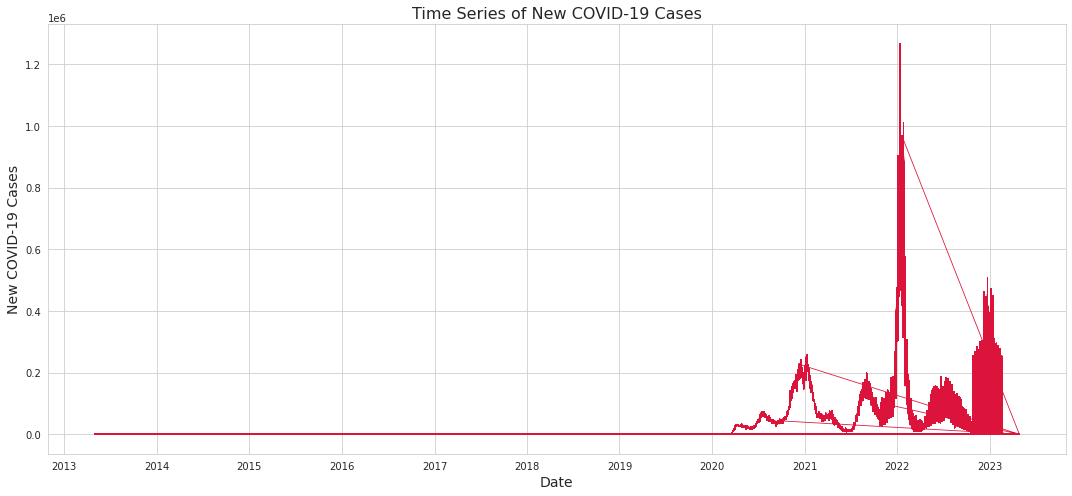

In [34]:
# Efficiently plotting Time Series of New_Covid_Cases using matplotlib
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
plt.figure(figsize=(15, 7))
plt.plot(merged_data['Date'], merged_data['New_Covid_Cases'], color='crimson', linewidth=0.8)
plt.title('Time Series of New COVID-19 Cases', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('New COVID-19 Cases', fontsize=14)
plt.tight_layout()
plt.savefig("New COVID-19 Cases.pdf", format='pdf')
plt.show()


The time series plot illustrates the progression of new COVID-19 cases over the study period:

- Initially, there were minimal or no reported cases until early 2020, marking the onset of the pandemic.
- The cases surged in waves, peaking in late 2020 and early 2021, followed by another spike towards the end of 2021.
- After the peaks, there were periods of decline, indicating efforts to control the pandemic, potentially through lockdowns, vaccination drives, and other preventive measures.
- By the end of the study period, the number of new cases had decreased, but periodic fluctuations were still evident.

### 5.2.5 Time Series Plot of Close Prices
We will observe the trend in closing prices over time for all companies in our dataset. This visualization will provide insights into the overall market trend and highlight any significant market movements.

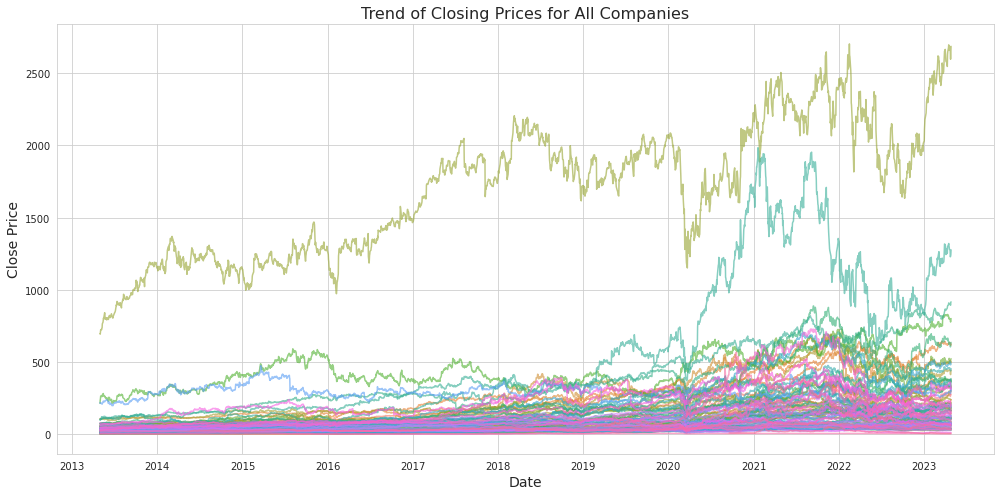

In [35]:
# Plotting the closing prices over time for all companies
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
plt.figure(figsize=(14, 7))
sns.lineplot(data=merged_data, x='Date', y='Close', hue='Ticker', legend=False, alpha=0.6)
plt.title('Trend of Closing Prices for All Companies', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price', fontsize=14)
plt.tight_layout()
plt.savefig("Time Series Plot of Close Prices.pdf", format='pdf')
plt.show()


The plot visualizes the trends in closing prices over the entire duration for the myriad of companies in our dataset:

- The plot captures the multifarious trajectories of different companies, underscoring the disparate impacts of global and company-specific events on stock prices.
- Some stocks demonstrate pronounced growth, while others remain relatively stable. There are also instances of stocks exhibiting volatile fluctuations.
- The dense overlapping of lines, especially during the pandemic era, encapsulates the increased market volatility and the synchronous movement of multiple stocks, which is characteristic of global events with widespread financial implications.